<a href="https://colab.research.google.com/github/siarasmall/comp_phys_proj2/blob/main/initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
NUM=100
dt = 0.1
dx = 0.1

In [ ]:
def potential_barrier(V, start, stop, mag):
  for i in range(start, stop):
    V[i][i] = mag

In [ ]:
M = diags([np.ones(NUM-1),-2*np.ones(NUM),np.ones(NUM-1)], [-1,0,1]).toarray()
I = np.identity(NUM)

# No potential:
# V = np.zeros([NUM, NUM])

# Potential barrier:
V = np.zeros([NUM, NUM])
potential_barrier(V, 0, 40, 1000)
potential_barrier(V, 50, 100, 1000)

total = I + 0.5*dt/(1j*dx**2) * M - dt/(1j) * V
# print(total)

inv = np.linalg.inv(total)
# print(inv)

In [ ]:
psi = np.zeros([NUM])
psi[45] = 3

# for i in range(0, 30):
#   psi[i] = 10/np.sqrt(2*np.pi) * np.exp(-0.5*(i-10)**2)

x = [0 + i*dx for i in range(NUM)]
# print(psi)

In [ ]:
# res = np.matmul(inv, psi)
# print(res)
# plt.plot(x, res.real, 'o-')
# plt.plot(x, psi.imag, 'b-')
# plt.legend(['real', 'img'])
# plt.show()

In [ ]:
# plt.ion()
# for i in range(100):
#   psi = np.matmul(inv, psi)
#   plt.plot(x, psi.real, 'o-')
#   plt.draw()
#   plt.pause(0.0001)
#   plt.clf()

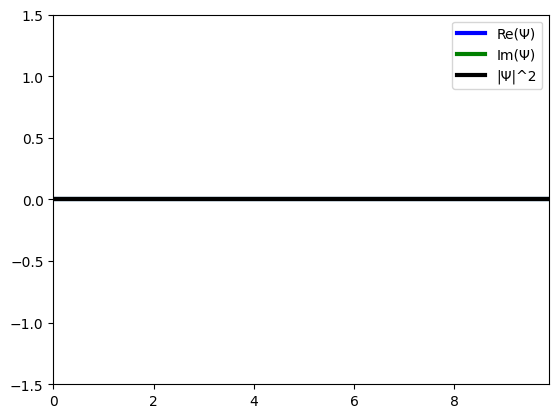

In [ ]:
fig = plt.figure()
axis = plt.axes(xlim =(0, x[-1]),
                ylim =(-1.5, 1.5))

# initializing a line variable
line1, = axis.plot([], [], 'b', lw = 3)
line2, = axis.plot([], [], 'g', lw = 3)
line3, = axis.plot([], [], 'k', lw = 3)

axis.legend([line1, line2, line3], ['Re(Ψ)', 'Im(Ψ)', '|Ψ|^2'])

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3,

def animate(i):
  global psi

  line1.set_data(x, psi.real)
  line2.set_data(x, psi.imag)
  line3.set_data(x, np.power(np.absolute(psi),2))
  psi = np.matmul(inv, psi)

  return line1, line2, line3,

anim = FuncAnimation(fig, animate, init_func = init, frames = 300, interval = 1, blit = True)

anim.save('test.mp4', writer = 'ffmpeg', fps = 30)

Second method

In [ ]:
from scipy import linalg

In [ ]:
NUM=100
dt = 0.1
dx = 0.1

In [ ]:
M = diags([np.ones(NUM-1),-2*np.ones(NUM),np.ones(NUM-1)], [-1,0,1]).toarray()
I = np.identity(NUM)
V = np.zeros([NUM, NUM])
H = -1/(2*dx**2) * M + V
print(H)

[[100. -50.   0. ...   0.   0.   0.]
 [-50. 100. -50. ...   0.   0.   0.]
 [  0. -50. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100. -50.   0.]
 [  0.   0.   0. ... -50. 100. -50.]
 [  0.   0.   0. ...   0. -50. 100.]]


In [ ]:
h1 = I - 0.5*1j*dt * H
h2 = I + 0.5*1j*dt * H

h2_inv = np.linalg.inv(h2)
h = np.dot(h2_inv, h1)

In [ ]:
def step_second_method(psi):
  return np.dot(h, psi)

In [ ]:
x2 = [0 + i*dx for i in range(NUM)]
psi2 = np.zeros([NUM])
psi2[10] = 2

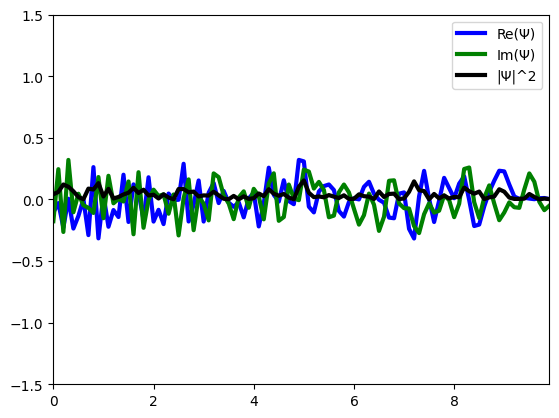

In [ ]:
fig = plt.figure()
axis = plt.axes(xlim =(0, x2[-1]),
                ylim =(-1.5, 1.5))

# initializing a line variable
line1, = axis.plot([], [], 'b', lw = 3)
line2, = axis.plot([], [], 'g', lw = 3)
line3, = axis.plot([], [], 'k', lw = 3)

axis.legend([line1, line2, line3], ['Re(Ψ)', 'Im(Ψ)', '|Ψ|^2'])

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3,

def animate(i):
  global psi2

  line1.set_data(x2, psi2.real)
  line2.set_data(x2, psi2.imag)
  line3.set_data(x2, np.power(np.absolute(psi2),2))
  psi2 = step_second_method(psi2)

  return line1, line2, line3,

anim = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 1, blit = True)

anim.save('test.mp4', writer = 'ffmpeg', fps = 30)